In [19]:
import numpy as np
import matplotlib.pyplot as plt
from classy import Class  
import math

In [20]:
Tcmb = 2.7255 #2.726
n_power_1 = 0
dm_mass_1 =  0 #GeV
sigma_dmb_1 = 0
l_2 = 5000

n_power_2 = 0
dm_mass_2 =  1 #GeV
sigma_dmb_2 = 2.1e-26 #Planck
l_1 = 5000

In [21]:
params_1 = {'output': 'tCl pCl lCl','l_max_scalars': l_1,'lensing': 'no',
                    'omega_dmb': 0.12,
                    'h': 0.6730804,
                    'omega_b': 0.0224,
                    'A_s': 2.2e-9,
                    'n_s': 0.96,
                    'tau_reio': 0.07,
                    'omega_cdm' :1e-22,
                    'm_dmb': dm_mass_1,'n_dmb': n_power_1,'sigma_dmb': sigma_dmb_1,
                    'N_ur': 2.0328,'N_ncdm': 1,'m_ncdm': 0.06,'T_ncdm':0.71611,
                    'reionization_optical_depth_tol': 1e-07,
                    'perturb_sampling_stepsize':0.01,
                    'k_max_tau0_over_l_max' : 6,'gauge' : 'synchronous'}
    
params_2 = {'output': 'tCl pCl lCl','l_max_scalars': l_2,'lensing': 'no',
                    'omega_dmb': 0.12,
                    'h': 0.6730804,
                    'omega_b': 0.0224,
                    'A_s': 2.2e-9,
                    'n_s': 0.96,
                    'tau_reio': 0.07,
                    'omega_cdm' :1e-22,
                    'm_dmb': dm_mass_2,'n_dmb': n_power_2,'sigma_dmb': sigma_dmb_2,
                    'N_ur': 2.0328,'N_ncdm': 1,'m_ncdm': 0.06,'T_ncdm':0.71611}
M1 = Class()
M1.set(params_1)
M1.compute()
cl_tot_1 = M1.raw_cl(l_1)
M1.struct_cleanup()
M1.empty()
cl_TT_1 = cl_tot_1['tt']
cl_EE_1 = cl_tot_1['ee']
ell_1 = cl_tot_1['ell']

Cl_est_kk1 = []
for i in ell_1:
    if i < 2:
        Cl_est_kk1.append(0)
    else:
        Cl_est_kk1.append(1/4*(math.factorial(i+2)/math.factorial(i-2))*cl_tot_1['pp'][i])
        
Cl_kk_1 = np.array(Cl_est_kk1)


M2 = Class()
M2.set(params_2)
M2.compute()
cl_tot_2 = M2.raw_cl(l_2)
M2.struct_cleanup()
M2.empty()
cl_TT_2 = cl_tot_2['tt']
cl_EE_2 = cl_tot_2['ee']
ell_2 = cl_tot_2['ell']

Cl_est_kk2 = []
for i in ell_2:
    if i < 2:
        Cl_est_kk2.append(0)
    else:
        Cl_est_kk2.append(1/4*(math.factorial(i+2)/math.factorial(i-2))*cl_tot_2['pp'][i])
        
Cl_kk_2 = np.array(Cl_est_kk2)

<ipython-input-38-04b2f762e7d1>:2: RuntimeWarning: invalid value encountered in true_divide
  plt.plot( cl_TT_1 /cl_TT_2,label="m={} crosssection={} n={} ".format(str(dm_mass_2),str(sigma_dmb_2),str(n_power_2)))


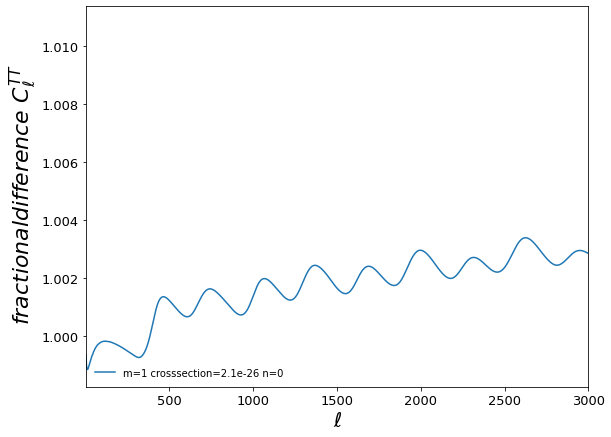

In [38]:
fig, ax = plt.subplots(figsize=(9, 7))
plt.plot( cl_TT_1 /cl_TT_2,label="m={} crosssection={} n={} ".format(str(dm_mass_2),str(sigma_dmb_2),str(n_power_2)))


plt.ylabel(r'$\ fractional difference    \ C_{\ell}^{TT}$',size=22)
plt.xlabel(r'$\ell$',size=20)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(loc='lower left', frameon=False)
plt.xlim([2, 3000])
#plt.ylim(-1.5,.05)6.757334442401046e-41

plt.show()
#fig.savefig("fisher_plots/fractional.png".format(str(n_power_2),str(dm_mass_2)))


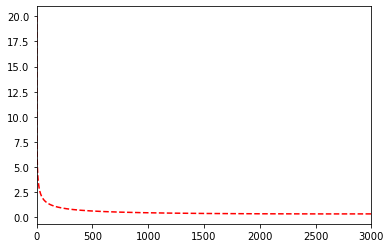

In [56]:
#error bars with 1mK-arc min noise and 1.5 arcmin beam full-width half maximum (FWHM) for 2<l<2000
#binned in l with a bin width of dl=50.


theta_fwhm = 1.5 #for S4  - arcmin

sigma_b = (theta_fwhm*0.00742) /60
W_l = np.exp(- ((ell_1**2)*(sigma_b**2) / 2) )#window function 
inv_w_x = 1 # mK-arcmin
            #inverse statistical weights per unit solid angle, 
            #a measure of experimental sensitivity independent of pixel size 

e_tt_p =np.sqrt(
    (2 /(2*ell_1 +1))   *   (((cl_TT_1 + (inv_w_x/(W_l**2))))**2)
               )

plt.plot(ell_1,100*(e_tt_p/np.sqrt(50)), 'r--',label="tt")
plt.plot(-ell_1,100*(e_tt_p/np.sqrt(50)), 'r--',label="tt")

plt.xlim(0,3000)
plt.show()

<ipython-input-58-4739a530a537>:2: RuntimeWarning: invalid value encountered in true_divide
  plt.plot( 100*(cl_EE_2 - cl_EE_1) /cl_EE_1,label="m={} crosssection={} n={} ".format(str(dm_mass_2),str(sigma_dmb_2),str(n_power_2)))


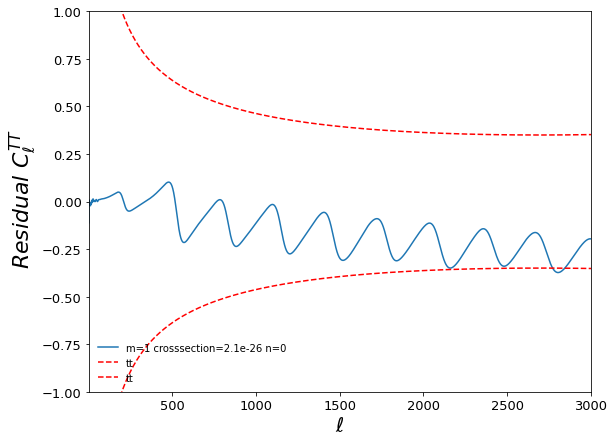

In [58]:
fig, ax = plt.subplots(figsize=(9, 7))
plt.plot( 100*(cl_EE_2 - cl_EE_1) /cl_EE_1,label="m={} crosssection={} n={} ".format(str(dm_mass_2),str(sigma_dmb_2),str(n_power_2)))
plt.plot(ell_1,100*(e_tt_p/np.sqrt(50)), 'r--',label="tt")
plt.plot(ell_1,-100*(e_tt_p/np.sqrt(50)), 'r--',label="tt")

plt.ylabel(r'$\ Residual    \ C_{\ell}^{TT}$',size=22)
plt.xlabel(r'$\ell$',size=20)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(loc='lower left', frameon=False)
plt.xlim([2, 3000])
plt.ylim(-1,1)

plt.show()
#fig.savefig("fisher_plots/residual_CL_EE_n={}_m={}_sigma_.png".format(str(n_power_2),str(dm_mass_2)))


<ipython-input-24-519c16d0be60>:2: RuntimeWarning: invalid value encountered in true_divide
  plt.plot( 100*(Cl_kk_2 - Cl_kk_1) /Cl_kk_1,label="m={} crosssection={} n={} ".format(str(dm_mass_2),str(sigma_dmb_2),str(n_power_2)))


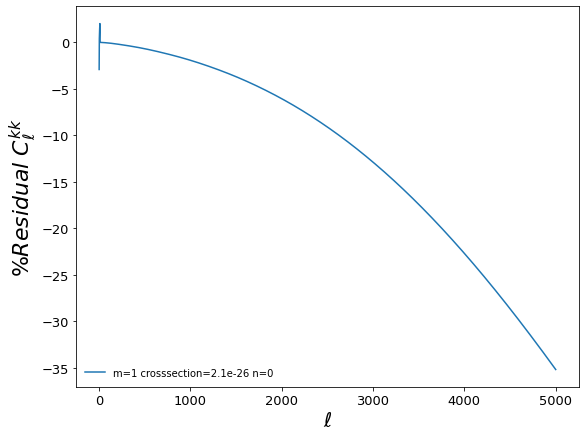

In [24]:
fig, ax = plt.subplots(figsize=(9, 7))
plt.plot( 100*(Cl_kk_2 - Cl_kk_1) /Cl_kk_1,label="m={} crosssection={} n={} ".format(str(dm_mass_2),str(sigma_dmb_2),str(n_power_2)))


plt.ylabel(r'$\% Residual    \ C_{\ell}^{kk}$',size=22)
plt.xlabel(r'$\ell$',size=20)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(loc='lower left', frameon=False)
#plt.xlim([2, 5000])
#plt.ylim(-1.5,.05)6.757334442401046e-41

plt.show()
#fig.savefig("fisher_plots/residual_CL_kk_n={}_m={}_sigma_.png".format(str(n_power_2),str(dm_mass_2)))


In [25]:
#stage 4 noise
a = np.load('noise/CMB_S4_noise.npy')
nl_tt_S4 = a[0] 
nl_ee_S4 = a[1] 
nl_kk_S4 = a[2]

In [26]:
#SO (baseline) noise 
# All noise spectra are for lensing convergence; no factors of ell or 2pi.
# i.e. these can be plotted directly against C_ell_kappa_kappa.

data = np.genfromtxt('noise/SO/nlkk_v3_1_0deproj0_SENS1_fsky0p4_it_lT30-3000_lP30-5000.dat',
                     dtype=None,
                     delimiter='')
data2 = np.genfromtxt('noise/SO/Apr17_mv_nlkk_deproj0_SENS1_fsky_16000_iterOn.csv',
                     dtype=None,
                     delimiter='')
noise_dat = np.transpose(data)
noise_dat2 = np.transpose(data2)
nl_tt_dat = noise_dat[1]
nl_te_dat = noise_dat[2]
nl_ee_dat = noise_dat[3]
n_kk_3000 = noise_dat2[1]
# ells, N_lensing_TT, N_lensing_TE, N_lensing_EE, N_lensing_TB, N_lensing_EB, N_lensing_Pol (EE+EB), N_lensing_MV (all), N_curl_TT, N_curl_TE, N_curl_EE, N_curl_TB, N_curl_EB, N_curl_Pol (EE+EB), N_curl_MV (all)

nl_tt_SO = [1e100 for i in range(0,5000, 1)]
nl_tt_SO[2:5000] = nl_tt_dat

nl_ee_SO = [1e100 for i in range(0,5000, 1)]
nl_ee_SO[2:5000] = nl_ee_dat

nl_te_SO = [1e100 for i in range(0,5000, 1)]
nl_te_SO[2:5000] = nl_te_dat

nl_kk_SO = [1e100 for i in range(0, 5000, 1)]
nl_kk_SO[20:2999] = n_kk_3000

In [27]:
nl_kk_CVL = np.genfromtxt('noise/cv-limited/lensing_cv.txt',
                     dtype=None,
                     delimiter='')

In [28]:
#planck
#data = np.loadtxt("noise/Planck_noise.npy", delimiter = " ")
#nl_kk_planck = data[:,3]*(1.0e6*Tcmb)**2


plancknoise = np.load('noise/Planck_noise.npy')
nl_tt_planck = plancknoise[0]
nl_ee_planck = plancknoise[1]
nl_kk_planck = plancknoise[2]

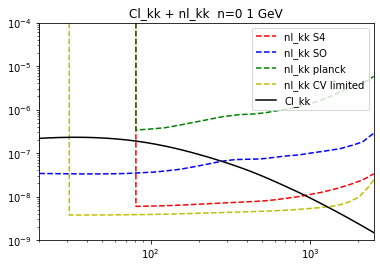

In [29]:
plt.plot(nl_kk_S4, 'r--',label="nl_kk S4")
plt.plot(nl_kk_SO, 'b--',label="nl_kk SO")
plt.plot(nl_kk_planck, 'g--',label="nl_kk planck")
plt.plot(nl_kk_CVL, 'y--',label="nl_kk CV limited")

plt.plot(Cl_est_kk1, 'k-',label="Cl_kk")

plt.yscale('log')
plt.xscale('log')
plt.ylim(1e-9,1e-4)
plt.xlim(20,2500)
plt.legend(loc="upper right")
plt.title('Cl_kk + nl_kk  n=0 1 GeV')
plt.savefig("noise_kk.png")
plt.show()

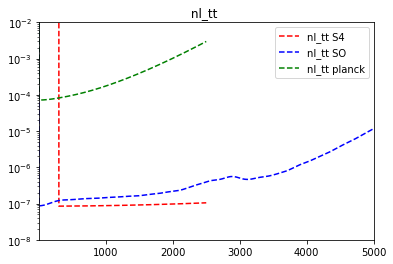

In [30]:
plt.plot(nl_tt_S4, 'r--',label="nl_tt S4")
plt.plot(nl_tt_SO, 'b--',label="nl_tt SO")
plt.plot(nl_tt_planck, 'g--',label="nl_tt planck")
#plt.plot(nl_tt_CVL, 'y--',label="nl_tt CV limited")

#plt.plot(Cl_est_tt1, 'k-',label="Cl_kk")

plt.yscale('log')
plt.ylim(1e-8,1e-2)
plt.xlim(2,5000)
plt.legend(loc="upper right")
plt.title(' nl_tt  ')
plt.savefig("noise_tt.png")
plt.show()

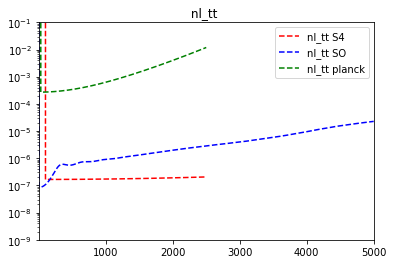

In [31]:
plt.plot(nl_ee_S4, 'r--',label="nl_tt S4")
plt.plot(nl_ee_SO, 'b--',label="nl_tt SO")
plt.plot(nl_ee_planck, 'g--',label="nl_tt planck")
#plt.plot(nl_tt_CVL, 'y--',label="nl_tt CV limited")

#plt.plot(Cl_est_tt1, 'k-',label="Cl_kk")

plt.yscale('log')
plt.ylim(1e-9,1e-1)
plt.xlim(2,5000)
plt.legend(loc="upper right")
plt.title(' nl_tt  ')
plt.savefig("noise_ee.png")
plt.show()

In [32]:
import numpy
data = numpy.random.random(100)
#bins = numpy.linspace(0, 1, 10)
#digitized = numpy.digitize(data, bins)
#bin_means = [data[digitized == i].mean() for i in range(1, len(bins))]

In [33]:
bin_means = (numpy.histogram(data, bins, weights=data)[0] /
             numpy.histogram(data, bins)[0])

NameError: name 'bins' is not defined